# Linear Regression: Predicting Score Margin

This notebook demonstrates a baseline linear regression model to predict college football game score margin using opponent-adjusted features.

**Linear Regression** is a statistical method used to model the relationship between a dependent variable and one or more independent variables. The goal is to find the best-fitting line (or hyperplane in higher dimensions) that predicts the dependent variable based on the independent variables.

### Types of Linear Regression

1. **Simple Linear Regression**: Involves one independent variable and one dependent variable. The relationship is modeled as a straight line.
   - Equation: \( y = mx + b \)
   - Where \( y \) is the dependent variable, \( x \) is the independent variable, \( m \) is the slope, and \( b \) is the y-intercept.

2. **Multiple Linear Regression**: Involves multiple independent variables. The relationship is still linear, but it accounts for more factors.
   - Equation: \( y = b_0 + b_1x_1 + b_2x_2 + ... + b_nx_n \)
   - Where \( b_0 \) is the intercept, and \( b_1, b_2, ..., b_n \) are the coefficients for each independent variable.

### How It Works

1. **Data Collection**: Gather data for the dependent variable (e.g., score margin) and independent variables (e.g., team stats).

2. **Model Training**: Use a dataset to train the model. The algorithm finds the best-fitting line by minimizing the difference between the predicted and actual values (using a method called "least squares").

3. **Prediction**: Once trained, the model can predict the dependent variable for new data by plugging in the values of the independent variables into the equation.

4. **Evaluation**: Assess the model's performance using metrics like Mean Absolute Error (MAE) or R-squared to see how well it predicts the outcome.

Linear regression is widely used because it is simple to understand and interpret, making it a good starting point for predictive modeling.

## 1. Load Data and Select Features
Load the dataset into a DataFrame.

In [2]:
import pandas as pd

df = pd.read_csv("training_data.csv").dropna()
df.head()

,id,start_date,season,season_type,week,neutral_site,home_team,home_conference,home_elo,home_talent,...,away_front_seven_havoc_defense,away_db_havoc_defense,home_points_per_opportunity_offense,away_points_per_opportunity_offense,home_points_per_opportunity_defense,away_points_per_opportunity_defense,home_avg_start_offense,home_avg_start_defense,away_avg_start_offense,away_avg_start_defense
0,400868950,2016-10-01 16:00:00,2016,regular,5,True,Syracuse,ACC,1346,520.26,...,0.064189,0.050676,2.833333,5.608696,4.363636,3.000000,75.0,71.5,73.3,73.3
1,400869017,2016-10-01 16:00:00,2016,regular,5,False,Vanderbilt,SEC,1415,619.03,...,0.127753,0.083700,3.428571,3.885714,2.675676,1.518519,69.6,62.9,71.9,71.7
2,400869013,2016-10-01 19:30:00,2016,regular,5,False,Georgia,SEC,1632,872.00,...,0.117021,0.056738,2.939394,3.828571,3.541667,3.193548,70.1,70.7,66.8,72.8
3,400869010,2016-10-01 23:00:00,2016,regular,5,False,Alabama,SEC,2125,982.66,...,0.074534,0.074534,4.205128,3.913043,2.466667,4.166667,68.8,74.1,69.4,71.1
4,400869606,2016-10-01 19:30:00,2016,regular,5,False,West Virginia,Big 12,1697,654.64,...,0.172414,0.055172,3.400000,3.250000,2.956522,2.235294,71.1,70.1,65.3,71.5


View available columns and select desired features for training the model.

In [3]:
df.columns

Index(['id', 'start_date', 'season', 'season_type', 'week', 'neutral_site',
       'home_team', 'home_conference', 'home_elo', 'home_talent', 'away_team',
       'away_conference', 'away_talent', 'away_elo', 'home_points',
       'away_points', 'margin', 'spread', 'home_adjusted_epa',
       'home_adjusted_epa_allowed', 'away_adjusted_epa',
       'away_adjusted_epa_allowed', 'home_adjusted_rushing_epa',
       'home_adjusted_rushing_epa_allowed', 'away_adjusted_rushing_epa',
       'away_adjusted_rushing_epa_allowed', 'home_adjusted_passing_epa',
       'home_adjusted_passing_epa_allowed', 'away_adjusted_passing_epa',
       'away_adjusted_passing_epa_allowed', 'home_adjusted_success',
       'home_adjusted_success_allowed', 'away_adjusted_success',
       'away_adjusted_success_allowed', 'home_adjusted_standard_down_success',
       'home_adjusted_standard_down_success_allowed',
       'away_adjusted_standard_down_success',
       'away_adjusted_standard_down_success_allowed',
      

We've selected a subset of features to start off. You can modify and expand this list based on your needs and preferences.

In [4]:
features = ['home_talent', 'away_talent', 'home_elo', 'away_elo','home_adjusted_epa', 'home_adjusted_epa_allowed',
            'away_adjusted_epa', 'away_adjusted_epa_allowed']

## 2. Train/Test Split (Season-Based)
Normally, we would split the data into training and testing sets using a random splitter. For simplicity, we will use a season-based split. The training set will consist of data from before the 2024 season, and the test set will consist of data from the 2024 season.

In [5]:
train_df = df[df['season'] < 2024]
test_df = df[df['season'] == 2024]

X_train = train_df[features]
y_train = train_df['margin']
X_test = test_df[features]
y_test = test_df['margin']

## 3. Train Ridge Regression Model

`Ridge` is a type of linear regression from scikit-learn that tries to predict numbers (like score margin) using math equations. It uses something called **L2 regularization** to help the model avoid "overfitting" (memorizing the training data too closely).

**Key points:**
- **L2 Regularization:** Adds a penalty for using really big numbers in the equation, so the model doesn't rely too much on any one feature.
- **Goal:** Finds the best equation to predict the answer, but also keeps the numbers in the equation from getting too large.
- **Parameter:** `alpha` controls how much penalty is added. Bigger `alpha` means more penalty.
- **When to use:** Good if your features are related to each other or you want to keep the model simple.

**Learn more:**  
[Ridge Regression — scikit-learn docs](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)

In [6]:
from sklearn.linear_model import Ridge

model = Ridge(alpha=1.0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

## 4. Evaluate Model Performance
We will evaluate the model's performance using three different metrics:
- **Mean Absolute Error (MAE):** Measures the average magnitude of errors in a set of predictions, without considering their direction. Imagine you guess the score margin for a bunch of games. MAE tells you, on average, how far off your guesses are from the real answers. Lower is better.
- **Mean Squared Error (MSE):** Measures the average of the squares of the errors, i.e., the average squared difference between the estimated values and the actual value. Like MAE, but it punishes big mistakes more. It squares the errors before averaging, so really bad guesses count extra.
- **R-squared (R²):** Imagine you are trying to guess the score margin for football games. R² tells you how good your guesses are compared to just always guessing the average score margin. If R² is **1**, your model predicts perfectly. If R² is **0**, your model is no better than just guessing the average every time. If R² is **negative**, your model is worse than just guessing the average. So, R² measures how much of the "spread" (variance) in the real results your model can explain. The closer R² is to 1, the better your model fits the data.

In [7]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.3f}")

MAE: 12.46
RMSE: 242.81
R²: 0.311


## 5. Visualize Predictions

In this scatter plot, each point represents a college football game from the test set. The x-axis shows the actual final score margin, while the y-axis shows the margin predicted by our Ridge regression model. The red dashed line (`y = x`) indicates perfect predictions. Points on this line mean the model's prediction exactly matched the actual result.

**Insights:**
- Points above the line: Model overestimated the margin.
- Points below the line: Model underestimated the margin.
- Tight clustering: Good predictive performance.
- Wide scatter: Model struggles to capture all factors affecting score margin.
- Systematic deviation: Possible bias (e.g., consistently over- or under-predicting).

This visualization helps us quickly assess how well our model generalizes to unseen games and whether further feature engineering or model tuning is needed.

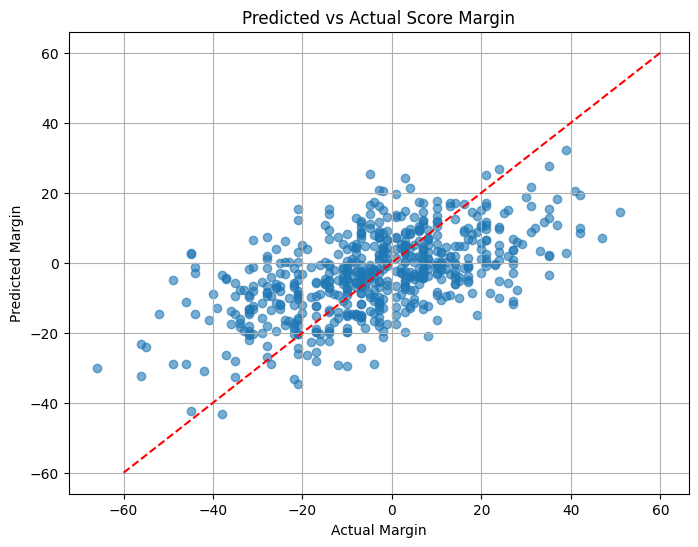

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([-60, 60], [-60, 60], 'r--')
plt.xlabel("Actual Margin")
plt.ylabel("Predicted Margin")
plt.title("Predicted vs Actual Score Margin")
plt.grid(True)
plt.show()

## 6. Analyze Feature Importance

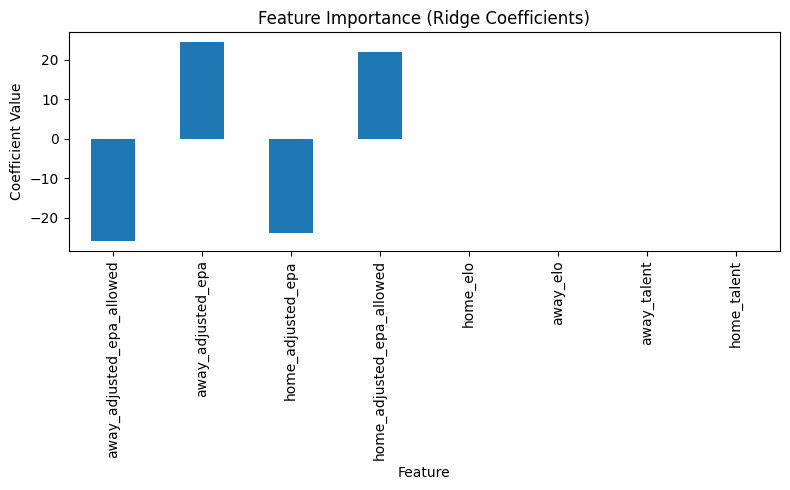

In [9]:
import numpy as np

# Visualize feature importance using model.coef_

coef = model.coef_
feature_importance = pd.Series(coef, index=features).sort_values(key=np.abs, ascending=False)

plt.figure(figsize=(8, 5))
feature_importance.plot(kind='bar')
plt.title("Feature Importance (Ridge Coefficients)")
plt.ylabel("Coefficient Value")
plt.xlabel("Feature")
plt.tight_layout()
plt.show()

The bar chart visualizes the coefficients (`model.coef_`) from the Ridge regression model for each feature used in training. 

- **Larger absolute values** (bars farther from zero) indicate features that have a stronger influence on the predicted score margin. These features are more important to the model's predictions.
- **Smaller absolute values** (bars close to zero) mean the feature has less impact on the prediction; the model relies on it less.

**Sign of the coefficient:**
- **Positive values:** Increasing this feature increases the predicted score margin. For example, if `home_talent` has a positive coefficient, higher home team talent leads to a higher predicted margin.
- **Negative values:** Increasing this feature decreases the predicted score margin. For example, if `away_elo` has a negative coefficient, higher away team Elo leads to a lower predicted margin for the home team.

In summary, the chart helps you see which features the model thinks are most important, and whether they push the predicted margin up or down.

## 7. Save Model
We will save the trained model to a file for later use.

In [10]:
import joblib

joblib.dump(model, "ridge_model.joblib")

# Later on, load the model from the file
# loaded_model = joblib.load("ridge_model.joblib")

['ridge_model.joblib']

## 8. Load Model and Make Predictions
Load the saved model and create a new DataFrame with the same features as the training data. The model will then give you predicted final score margins for the games in the new DataFrame.

In [16]:
model = joblib.load("ridge_model.joblib")

pdf = df.query("season == 2023 and week == 13")

pdf['prediction'] = model.predict(pdf[features])

pdf[['home_team', 'away_team', 'spread', 'prediction']].head(10)

/tmp/ipykernel_73960/1761872369.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pdf['prediction'] = model.predict(pdf[features])


,home_team,away_team,spread,prediction
3798,Stanford,Notre Dame,26.0,30.454672
3799,Georgia Tech,Georgia,25.0,25.646318
3800,Louisville,Kentucky,-7.5,-9.574806
3801,Tennessee,Vanderbilt,-27.0,-27.829621
3802,Kansas State,Iowa State,-9.5,-15.346283
3803,Texas,Texas Tech,-16.0,-17.567133
3804,Cincinnati,Kansas,7.5,7.427167
3805,Oklahoma,TCU,-10.0,-16.801120
3806,Baylor,West Virginia,13.0,4.932260
3807,Ball State,Miami (OH),4.0,7.853099


## 9. Next Steps
- **Feature Engineering:** Explore additional features or transformations to improve model performance.
- **Hyperparameter Tuning:** Experiment with different values of `alpha` in the Ridge model to find the best regularization strength.
- **Model Comparison:** Try other regression models (e.g., Lasso, ElasticNet) to see if they perform better.